# Week 8 Monday


## Rough plan for this week's classes

* Today: Decision trees
* Wednesday: Random forests
* Friday: More on Decision trees/random forests, then an introduction to the Course Project

## Announcements

* Worksheets 13 and 14 due tonight.
* Quiz tomorrow, based on the worksheets due tonight
* I plan to have a quiz in Week 9 but not in Week 10
* Monday of Week 9 is Memorial Day, so Worksheets 15 and 16 will be due Tuesday night instead of Monday night.  You should still finish them before discussion section, because they are the most useful way to study for the in-class quiz.
* Midterm 2 is Friday of Week 9

## Loading the iris dataset

The iris dataset (also available from Seaborn) is smaller than most of the datasets we work with in Math 10 (it only contains 150 rows/observations/data points).  But it is one of the most classic datasets in Machine Learning, so we should see it at some point.

In [2]:
import pandas as pd
import seaborn as sns
import altair as alt

In [3]:
df = sns.load_dataset("iris")

This dataset is fairly similar to the penguins dataset, but with fewer rows and columns.  The penguins dataset has some missing data, but the iris dataset does not have any missing values.  Overall, the iris dataset is a little easier to analyze.

In [4]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Here is a quick look at the data.  I chose a non-standard color scheme because with the standard color scheme, the versicolor and virginica irises receive similar colors (I think one is orange and the other is red).

In [5]:
alt.Chart(df).mark_circle(size=50).encode(
    x="petal_length",
    y="petal_width",
    color=alt.Color("species", scale=alt.Scale(scheme="dark2")),
    tooltip=["petal_length", "petal_width"]
)

alt.Chart(...)

## Visualizing how a decision tree splits the data

Our goal is to divide the iris data by species.

* First we will divide by petal length.
* Then we will divide by petal width.
* Where would you make these divisions?

Guesses: petal length 2.5 and petal width 1.65 or 1.75.

(Be sure to look over the above chart and make sure you agree with these predictions.)

* How many "leaves" will the corresponding decision tree have?  (How many regions or cells does our domain get divided into?)

Three regions

(If you don't see why it's 3 regions, scrolling to the very bottom of this notebook, where we illustrate the decision boundary, might make it more clear.)

## A Decision tree with two splits



* Create an instance of a `DecisionTreeClassifier` with `max_leaf_nodes` as above.  Specify `random_state=2` (which will help me know that the first split happens on "petal_length"... if it doesn't work, try some other values of `random_state`).
* Fit the classifier to the training data using `cols = ["petal_length", "petal_width"]` for the input features and using `"species"` for the target.

In [6]:
from sklearn.tree import DecisionTreeClassifier

Initially I forgot to set the `random_state` value, which led to the first split happening on "petal_width".

The most important thing to notice here is that we are putting a (heavy) constraint on the decision tree, by only allowing it to have 3 regions (3 leaf nodes).  This will help reduce the potential for overfitting.

(Reminder: on Friday last week, we saw two different pieces of evidence for overfitting.  One was just intuition: we had a very random-looking collection of data divided into four classes, and we achieved 93% accuracy.  The other evidence was more precise: on the test set, which was not used when fitting the classifier, the accuracy dropped to 28%.  In general, if you don't put a constraint on a decision tree, it is likely to overfit the data.)

In [12]:
clf = DecisionTreeClassifier(max_leaf_nodes=3, random_state=2)

We will use the following two input features.

In [8]:
cols = ["petal_length", "petal_width"]

We fit the classifier to the data, just like usual, by calling the `fit` method.

In [13]:
clf.fit(df[cols], df["species"])

DecisionTreeClassifier(max_leaf_nodes=3, random_state=2)

* Illustrate the resulting tree using the following.
* Does it match what we expected from the Altair chart?

Don't bother trying to memorize this syntax (I don't have it memorized), but it's very important to be able to interpret the decision tree plot once you have it displayed.

```
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

fig = plt.figure()
_ = plot_tree(clf, 
                   feature_names=clf.feature_names_in_,
                   class_names=clf.classes_,
                   filled=True)
```

In [10]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

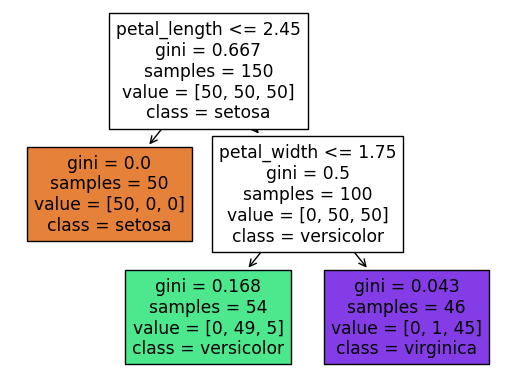

In [14]:
fig = plt.figure()
_ = plot_tree(clf, 
                   feature_names=clf.feature_names_in_,
                   class_names=clf.classes_,
                   filled=True)

* What is the depth of the corresponding tree?  We can answer by looking at the diagram, or by using the `get_depth` method.

Assuming we count the top row as row 0, then we see that the bottom row is row 2.  That is where the depth of `2` comes from.

In [16]:
clf.get_depth()

2

* What is the theoretical maximum number of leaf nodes for a Decision Tree with depth $m$?

In the above picture, we only don't split the leaf at the left, because it already contains only irises from the setosa species, but theoretically we could split such a node in two, and then we would have four nodes on the bottom.  In general, if the depth is $m$, then the maximum number of leaf nodes is $2^m$.

## Ten minutes to work on Worksheets

I'll also post today's worksheet now.

## Predictions and predicted probabilities

* What species will be predicted for an iris with the following (physically impossible) values?
```
{"petal_length": 4, "petal_width": -5}
```

Here is one way to make a one-row DataFrame.  We pass to the constructor a length-one list with a dictionary in it.

In [17]:
pd.DataFrame([{"petal_length": 4, "petal_width": -5}])

,petal_length,petal_width
0,4,-5


Here is another way to make a one-row DataFrame: we pass a dictionary to the constructor, with values length-one lists.  Notice that this creates the same DataFrame as the previous cell.

In [19]:
df_fake = pd.DataFrame({"petal_length": [4], "petal_width": [-5]})
df_fake

,petal_length,petal_width
0,4,-5


Here is a common warning that I've seen in worksheets.  The complaint is that we are inputting something without column names.

In [20]:
clf.predict([[4, -5]])

/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


array(['versicolor'], dtype=object)

The warning goes away if we input a DataFrame with appropriate column names (meaning with the same column names as were used when we called `fit`.  Notice how we get the same prediction as in the previous cell.

In [21]:
clf.predict(df_fake)

array(['versicolor'], dtype=object)

* What are the corresponding predicted probabilities?

We can find this probability by calling the `predict_proba` method.  There are three numbers, corresponding to the probabilities of the three classes.

In [22]:
clf.predict_proba(df_fake)

array([[0.        , 0.90740741, 0.09259259]])

Here are the corresponding classes.  Notice how the highest probability corresponds to *versicolor*, which was the prediction above.

In [23]:
clf.classes_

array(['setosa', 'versicolor', 'virginica'], dtype=object)

Important: where does this probability come from?  If you look at the tree diagram above, you see that we start at the top and then move right (because $4 > 2.45$), and then move to the left (because $-5 \leq 1.75$).  We wind up in a cell with `value = [0, 49, 5]`, which stands for 0 setosa, 49 versicolor, and 5 virginica.  Also, if you look at our Altair chart above, you should even be able to see the 5 virginica flowers in this cell.

The probability of being versicolor then corresponds to 49/54.

In [24]:
49/(0+49+5)

0.9074074074074074

* Could you have predicted those probabilities from the visualization above?

By counting how many of each flower species were in the lower-right region.

## The decision boundary for our decision tree

* Illustrate the decision boundary for our decision tree classifier using 5000 random values for the petal length and petal width.

We went pretty quickly through this part.  The most important thing is to understand how the below chart relates to the divisions we were making above.

In [25]:
import numpy as np

Here we instantiate a random number generator.  This will only be used to generate (5000) random points for our chart, so there is no real advantage to using a `seed` value.  (We aren't using these values to produce any precise numbers.)

In [26]:
rng = np.random.default_rng()

We want 5000 points, each with two features.

In [27]:
arr = rng.random(size=(5000, 2))

We convert this NumPy array to a DataFrame, and name the columns.  (If we didn't name the columns, then when we call predict, we would have the same warning as we saw above.

In [28]:
df_art = pd.DataFrame(arr, columns=cols)

I want these columns to have the same kind of range as in the original dataset.  They currently go from 0 to 1.  We multiply the "petal_length" column by 7.  (Be careful not to execute this cell more than once.)

In [29]:
df_art["petal_length"] *= 7

Similarly we multiply the petal width by 2.5.  (Look up at the Altair Chart to see where 2.5 came from.)

In [30]:
df_art["petal_width"] *= 2.5

We now add a prediction column.  (This is the step which would raise a warning if we didn't have correct column names.)

In [31]:
df_art["pred"] = clf.predict(df_art[cols])

Now we make the chart.  This shows a decision tree with three leaf nodes (three regions).  The decision boundaries are straight lines, like for logistic regression.  Moreover, these straight lines are always parallel to the coordinate axes.  So it might sound like decision trees are less flexible than logistic regression classifiers.  But in fact, decision trees are more prone to overfitting than logistic regression classifiers in general, because as the number of leaf nodes increases, the regions can get more and more complex/specialized.

It's worth staring at the following image, together with the illustrated decision tree above (the one produced by `plot_tree`), and seeing how they compare.  For example, do you see why the boundary line at petal width 1.75 only goes to the right?  (Why doesn't it continue all the way to the left of petal length 2.45, in terms of the above visualization of the decision tree?)

In [32]:
alt.Chart(df_art).mark_circle(size=50).encode(
    x="petal_length",
    y="petal_width",
    color=alt.Color("pred", scale=alt.Scale(scheme="dark2")),
    tooltip=["petal_length", "petal_width"]
)

alt.Chart(...)